In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import pipeline

In [2]:
df = pd.read_csv('/content/Customer Feedback - Data.csv')

In [3]:
df.columns

Index(['customerID', 'Gender', 'Senior Citizen', 'Marital Status',
       'Dependents', 'tenure in months', 'Priority Account', 'Credit Cards',
       'Loan Account', 'Netbanking', 'Debit Card', 'MobileApp',
       'TechSupport Availed', 'Zero Balance Account', 'FDs',
       'Interest Deposited', 'Paperless Banking',
       'Monthly Average Balance (USD)', 'Yearly Average Balance (USD)',
       'Churn', 'Customer Feedback', 'Category', 'Recommendation'],
      dtype='object')

In [4]:
df.head()

,customerID,Gender,Senior Citizen,Marital Status,Dependents,tenure in months,Priority Account,Credit Cards,Loan Account,Netbanking,...,Zero Balance Account,FDs,Interest Deposited,Paperless Banking,Monthly Average Balance (USD),Yearly Average Balance (USD),Churn,Customer Feedback,Category,Recommendation
0,5522-JBWMO,Male,0,No,Yes,1.0,Yes,No,general loan,No,...,No,No,Month-to-month,No,44.0,44,No,My Credit Card is not generating OTP.,Credit Card,NaN
1,5275-PMFUT,Male,0,Yes,Yes,72.0,No,No,general loan,Yes,...,Yes,Yes,Two year,Yes,64.8,4719.75,No,The Current Account charges are too high.,Current Account,NaN
2,5609-CEBID,Female,1,No,No,20.0,Yes,Yes,top up loan,No,...,No,Yes,Month-to-month,Yes,94.1,1782.4,Yes,The loan prepayment charges are too high.,Loans,NaN
3,4381-MHQDC,Female,0,No,No,47.0,Yes,Yes,general loan,Yes,...,No,No,Two year,Yes,65.0,2879.9,No,The Savings Account opening process was very s...,Savings Account,NaN
4,6353-BRMMA,Female,0,Yes,Yes,54.0,Yes,Yes,top up loan,Yes,...,Yes,Yes,Month-to-month,Yes,104.1,5645.8,No,The loan documentation process is very complic...,Loans,NaN


In [5]:
columns_to_extract = ['customerID','Category', 'Customer Feedback' ]

In [6]:
df_extracted = df[columns_to_extract]

In [7]:
df_extracted.head()

,customerID,Category,Customer Feedback
0,5522-JBWMO,Credit Card,My Credit Card is not generating OTP.
1,5275-PMFUT,Current Account,The Current Account charges are too high.
2,5609-CEBID,Loans,The loan prepayment charges are too high.
3,4381-MHQDC,Savings Account,The Savings Account opening process was very s...
4,6353-BRMMA,Loans,The loan documentation process is very complic...


In [8]:
model_path = "cardiffnlp/twitter-roberta-base-sentiment-latest"
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [14]:
# Sentiment analysis using the transformers model
def get_sentiment(text):
    result = sentiment_task(text)[0]
    return result['label'], result['score']

df_extracted['sentiment'], df_extracted['confidence'] = zip(*df_extracted['Customer Feedback'].apply(get_sentiment))

<ipython-input-14-0a08c6371805>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extracted['sentiment'], df_extracted['confidence'] = zip(*df_extracted['Customer Feedback'].apply(get_sentiment))
<ipython-input-14-0a08c6371805>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extracted['sentiment'], df_extracted['confidence'] = zip(*df_extracted['Customer Feedback'].apply(get_sentiment))


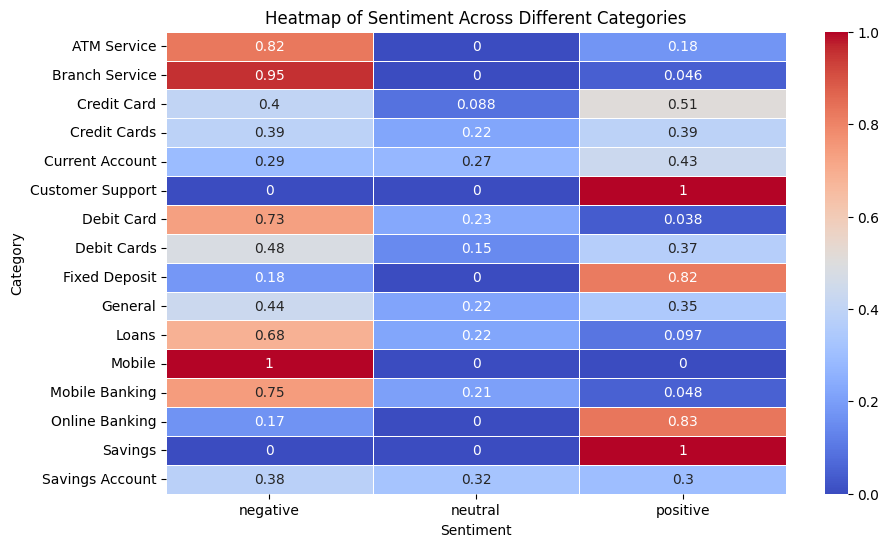

In [15]:
pivot_table = pd.pivot_table(df_extracted, values='customerID',
                             index='Category',
                             columns='sentiment',
                             aggfunc='count',
                             fill_value=0)

pivot_table = pivot_table.div(pivot_table.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Heatmap of Sentiment Across Different Categories')
plt.ylabel('Category')
plt.xlabel('Sentiment')

plt.show()

<ipython-input-16-c92f28e029c0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


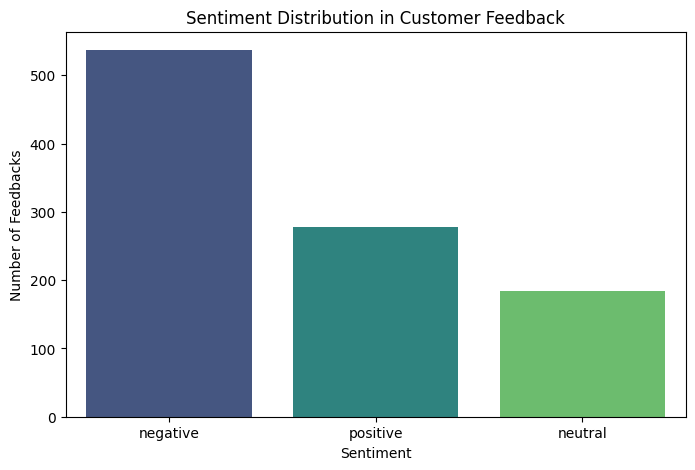

In [16]:
sentiment_counts = df_extracted['sentiment'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution in Customer Feedback')
plt.xlabel('Sentiment')
plt.ylabel('Number of Feedbacks')
plt.show()

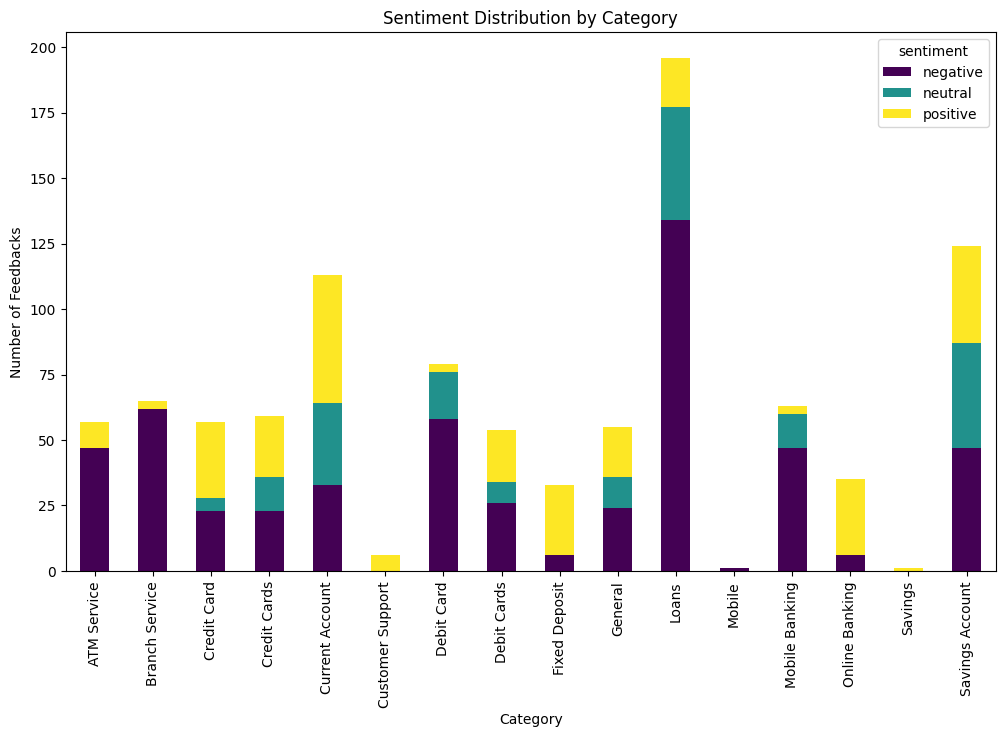

In [17]:
sentiment_category = df_extracted.groupby('Category')['sentiment'].value_counts().unstack()
sentiment_category.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
plt.title('Sentiment Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Feedbacks')
plt.show()

Number of negative feedback entries: 537


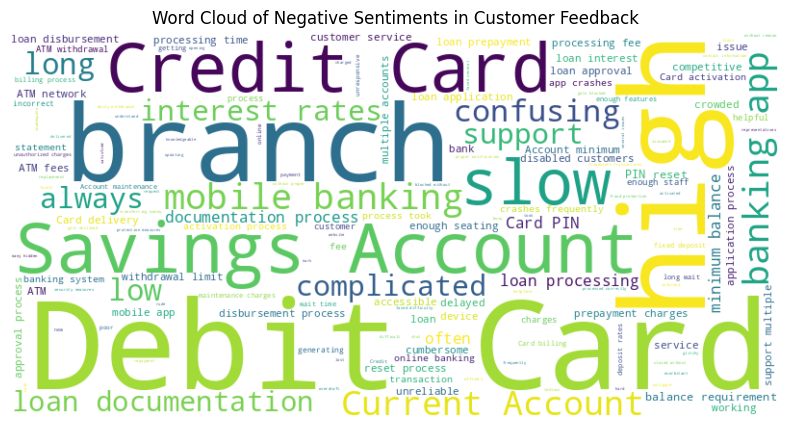

In [18]:
from wordcloud import WordCloud

negative_feedback_count = df_extracted[df_extracted['sentiment'] == 'negative'].shape[0]
print(f"Number of negative feedback entries: {negative_feedback_count}")

if negative_feedback_count > 0:
    negative_feedback = df_extracted[df_extracted['sentiment'] == 'negative']['Customer Feedback']

    all_negative_feedback = ' '.join(negative_feedback)

    wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(all_negative_feedback)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negative, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Negative Sentiments in Customer Feedback')
    plt.show()
else:
    print("No negative feedback found to generate the word cloud.")